Feature Extraction - reducing features in a dataset by making new features that summarize already existing features

Potential Benefits: improved accuracy, faster training, reduced risk of overfitting, more easily explained models, and the data is more easy to represent

Code and guide borrowed from:
https://www.kaggle.com/pierpaolo28/feature-extraction?scriptVersionId=21698205

In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
!pip install plotly==3.10.0
from chart_studio import plotly
import plotly.offline


*Dataset: https://www.kaggle.com/uciml/mushroom-classification

In [2]:
dataset = pd.read_csv('mushrooms.csv')
pd.options.display.max_columns = None
dataset.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s                        s                      w   
2                        s                        s                      w   
3                        s                        s                      w   
4                        s                        s                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o         p   
1                      w         p          w           o         p   
2                      w         p          w           o         p   
3                      w         p          w           o         p   
4                      w         p          w           o         e   

  spore-print-color population habitat  
0                 k          s       u  
1                 n          n       g  
2                 n          n       m  
3                 k          s       u  
4                 n          a       g

class: edible=e,poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

*This section determines how much data we are missing and displays it by column

In [3]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

percent_missing
class                                 0.0
stalk-surface-above-ring              0.0
population                            0.0
spore-print-color                     0.0
ring-type                             0.0
ring-number                           0.0
veil-color                            0.0
veil-type                             0.0
stalk-color-below-ring                0.0
stalk-color-above-ring                0.0
stalk-surface-below-ring              0.0
stalk-root                            0.0
cap-shape                             0.0
stalk-shape                           0.0
gill-color                            0.0
gill-size                             0.0
gill-spacing                          0.0
gill-attachment                       0.0
odor                                  0.0
bruises                               0.0
cap-color                             0.0
cap-surface                           0.0
habitat                               0.0

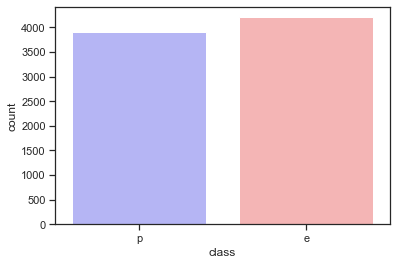

In [4]:
sns.set(style="ticks")
f = sns.countplot(x="class", data=dataset, palette="bwr")
plt.show()

*countplot - histogram-like graph for categorical data rather than quantitative data, hows how many of the dataset were either poisonous or edible

In [5]:
dataset['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
X = dataset.drop(['class'], axis = 1)
Y = dataset['class']

In [7]:
X = pd.get_dummies(X, prefix_sep='_')
X.head()

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   cap-color_b  cap-color_c  cap-color_e  cap-color_g  cap-color_n  \
0            0            0            0            0            1   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            1            0   

   cap-color_p  cap-color_r  cap-color_u  cap-color_w  cap-color_y  bruises_f  \
0            0            0            0            0            0          0   
1            0            0            0            0            1          0   
2            0            0            0            1            0          0   
3            0            0            0            1            0          0   
4            0            0            0            0            0          1   

   bruises_t  odor_a  odor_c  odor_f  odor_l  odor_m  odor_n  odor_p  odor_s  \
0          1       0       0       0       0       0       0       1       0   
1          1       1       0       0       0       0       0       0       0   
2          1       0       0       0       1       0       0       0       0   
3          1       0       0       0       0       0       0       1       0   
4          0       0       0       0       0       0       1       0       0   

   odor_y  gill-attachment_a  gill-attachment_f  gill-spacing_c  \
0       0                  0                  1               1   
1       0                  0                  1               1   
2       0                  0                  1               1   
3       0                  0                  1               1   
4       0                  0                  1               0   

   gill-spacing_w  gill-size_b  gill-size_n  gill-color_b  gill-color_e  \
0               0            0            1             0             0   
1               0            1            0             0             0   
2               0            1            0             0             0   
3               0            0            1             0             0   
4               1            1            0             0             0   

   gill-color_g  gill-color_h  gill-color_k  gill-color_n  gill-color_o  \
0             0             0             1             0             0   
1             0             0             1             0             0   
2             0             0             0             1             0   
3             0             0             0             1             0   
4             0             0             1             0             0   

   gill-color_p  gill-color_r  gill-color_u  gill-color_w  gill-color_y  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0 

In [8]:
len(X.columns)

117

In [9]:
Y = LabelEncoder().fit_transform(Y)
Y

array([1, 0, 0, ..., 0, 1, 0])

Machine Learning Steps

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X = StandardScaler().fit_transform(X)

In [11]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [12]:
def complete_test_2D(X, Y, plot_name = 'mushrooms.csv'):
    Small_dataset = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_dataset = pd.concat([Small_dataset, dataset['class']], axis = 1)
    Small_dataset['class'] = LabelEncoder().fit_transform(Small_dataset['class'])
    forest_test(X, Y)
    data = []
    for clas, col, name in zip((1, 0), ['red', 'darkblue'], ['Poisonous', 'Edible']):

        trace = dict(
            type='scatter',
            x= Small_dataset.loc[Small_dataset['class'] == clas, 'C1'],
            y= Small_dataset.loc[Small_dataset['class'] == clas, 'C2'],
            mode= 'markers',
            name= name,
            marker=dict(
                color=col,
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8)
        )
        data.append(trace)

    layout = dict(
            title= plot_name + ' 2D Dimensionality Reduction',
            xaxis=dict(title='C1', showline=False),
            yaxis=dict(title='C2', showline=False)
    )
    fig = dict(data=data, layout=layout)
    plotly.offline.iplot(fig)

In [13]:
def complete_test_3D(X, Y, plot_name = ''):
    Small_dataset = pd.DataFrame(data = X, columns = ['C1', 'C2', 'C3'])
    Small_dataset = pd.concat([Small_dataset, dataset['class']], axis = 1)
    Small_dataset['class'] = LabelEncoder().fit_transform(Small_dataset['class'])
    forest_test(X, Y)
    data = []
    for clas, col, name in zip((1, 0), ['red', 'darkblue'], ['Poisonous', 'Edible']):

        trace = dict(
            type='scatter3d',
            x= Small_dataset.loc[Small_dataset['class'] == clas, 'C1'],
            y= Small_dataset.loc[Small_dataset['class'] == clas, 'C2'],
            z= Small_dataset.loc[Small_dataset['class'] == clas, 'C3'],
            mode= 'markers',
            name= name
        )
        data.append(trace)

    layout = {
        "scene": {
          "xaxis": {
            "title": "C1", 
            "showline": False
          }, 
          "yaxis": {
            "title": "C2", 
            "showline": False
          }, 
          "zaxis": {
            "title": "C3", 
            "showline": False
          }
        }, 
        "title": plot_name + ' 3D Dimensionality Reduction'
    }
    fig = dict(data=data, layout=layout)
    plotly.offline.iplot(fig)

In [14]:
forest_test(X, Y)

2.859375
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



precision: % of results that are relevant
recall: % of relevant results that were correctly classified
f1-score: avg(precision and recall)
support: # of actual occurances

Principal Component Analysis (PCA)

*process of computing the principal components and to use them for a change of basis, mainly for exploratory data analysis and predictive models, used for dimensionality reduction
*principal components are eigenvectors of the data's convariance matrix

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_dataset = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_dataset = pd.concat([PCA_dataset, dataset['class']], axis = 1)
PCA_dataset['class'] = LabelEncoder().fit_transform(PCA_dataset['class'])
PCA_dataset.head()

PC1       PC2  class
0 -3.284786  1.020093      1
1 -3.969506 -0.856883      0
2 -4.958621 -0.211108      0
3 -3.470014  0.337920      1
4 -2.726592  0.889644      0

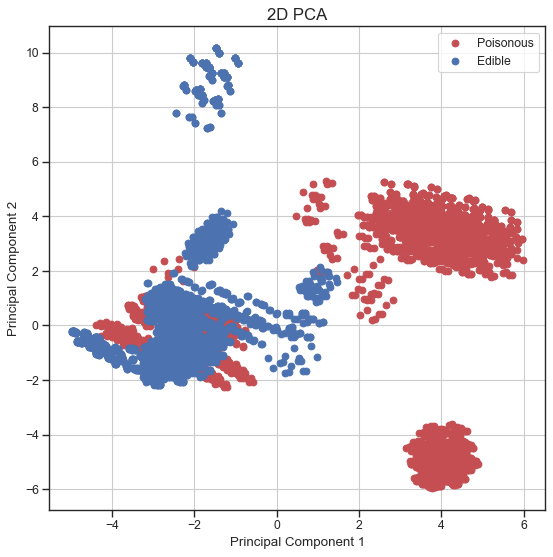

In [16]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_dataset.loc[PCA_dataset['class'] == clas, 'PC1'], PCA_dataset.loc[PCA_dataset['class'] == clas, 'PC2'], c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

In [17]:
pca.explained_variance_ratio_

array([0.08891017, 0.08125474])

In [18]:
complete_test_2D(X_pca, Y, 'PCA')

3.90625
[[1242   32]
 [  92 1072]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1274
           1       0.97      0.92      0.95      1164

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



precision: % of results that are relevant
recall: % of relevant results that were correctly classified
f1-score: avg(precision and recall)
support: # of actual occurances

In [19]:
var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_ratio,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_ratio,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance Ratio by each principal components',
    yaxis=dict(
        title='Explained variance ratio in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig)

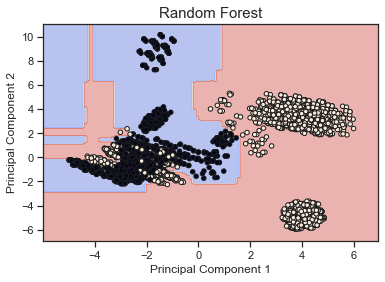

In [20]:
from itertools import product

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = trainedforest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('Random Forest', fontsize = 15)
plt.show()

In [21]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
complete_test_3D(X_pca, Y, 'PCA')

4.046875
[[1259   15]
 [  40 1124]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1274
           1       0.99      0.97      0.98      1164

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



precision: % of results that are relevant
recall: % of relevant results that were correctly classified
f1-score: avg(precision and recall)
support: # of actual occurances

In [22]:
var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_ratio,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_ratio,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance Ratio by each principal components',
    yaxis=dict(
        title='Explained variance ratio in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig)

T-Distributed Stochastic Neighbor Embedding (t-SNE)

*nonlinear, used to display high-dimensional data with two or three dimensions, and has two stages
*first stage: creates probability distribution for pairs of points while in high-dimension, giving similar points a high probability and dissimilar points low probability
*second stage: defines a similar probability distribution in two or three dimensions

In [23]:
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.002s...
[t-SNE] Computed neighbors for 8124 samples in 2.168s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 2.658530
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.869400
[t-SNE] KL divergence after 300 iterations: 2.133219
t-SNE done! Time elapsed: 20.007962465286255 seconds


<AxesSubplot:>

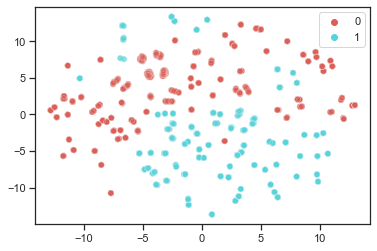

In [24]:
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=Y,
    palette=sns.color_palette("hls", 2),
    data=dataset,
    legend="full",
    alpha=0.3
)

In [25]:
complete_test_2D(X_tsne, Y, 't-SNE')

3.890625
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



precision: % of results that are relevant
recall: % of relevant results that were correctly classified
f1-score: avg(precision and recall)
support: # of actual occurances

In [26]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)
complete_test_3D(X_tsne, Y, 't-SNE')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.002s...
[t-SNE] Computed neighbors for 8124 samples in 2.701s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 2.658530
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.645889
[t-SNE] KL divergence after 300 iterations: 1.904211
5.328125
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0 

Linear Discriminant Analysis (LDA)

*used mainly to find linear correlation between features of classes, more focused on the differences between the classes
*closely related to PCA

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 117
Reduced number of features: 1


In [28]:
lda.explained_variance_ratio_

array([1.])

In [29]:
forest_test(X_lda, Y)

2.796875
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



precision: % of results that are relevant
recall: % of relevant results that were correctly classified
f1-score: avg(precision and recall)
support: # of actual occurances

In [30]:
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_lda, Y, test_size = 0.30, random_state = 101)

start = time.process_time()
lda = LinearDiscriminantAnalysis().fit(X_Reduced,Y_Reduced)
print(time.process_time() - start)
predictionlda = lda.predict(X_Test_Reduced)
print(confusion_matrix(Y_Test_Reduced,predictionlda))
print(classification_report(Y_Test_Reduced,predictionlda))

0.0
[[1274    0]
 [   2 1162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



precision: % of results that are relevant
recall: % of relevant results that were correctly classified
f1-score: avg(precision and recall)
support: # of actual occurances

C:\Users\kboik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\kboik\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

C:\Users\kboik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\kboik\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, 

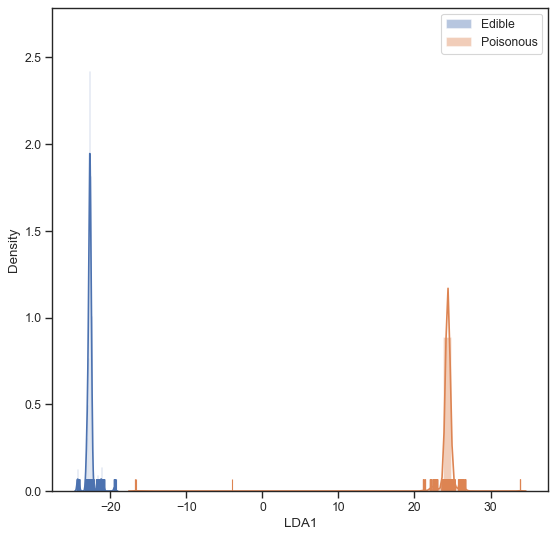

In [31]:
LDA_dataset = pd.DataFrame(data = X_lda, columns = ['LDA1'])
LDA_dataset = pd.concat([LDA_dataset, dataset['class']], axis = 1)
LDA_dataset['class'] = LabelEncoder().fit_transform(LDA_dataset['class'])

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(LDA_dataset.loc[LDA_dataset['class'] == 0]['LDA1'], label = 'Edible', hist=True, kde=True, rug=True)
sns.distplot(LDA_dataset.loc[LDA_dataset['class'] == 1]['LDA1'], label = 'Poisonous', hist=True, kde=True, rug=True)
plt.legend(loc='upper right')

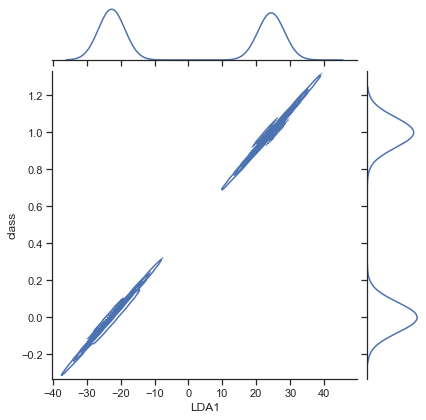

In [32]:
sns.jointplot(x="LDA1", y="class", data=LDA_dataset, kind="kde")

C:\Users\kboik\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning:

The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.

C:\Users\kboik\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning:

The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.



<AxesSubplot:xlabel='Density', ylabel='LDA1'>

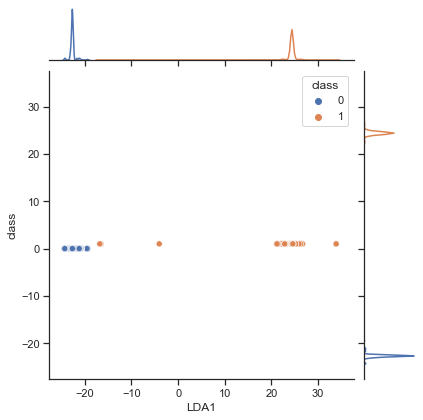

In [33]:
grid = sns.JointGrid(x='LDA1', y='class', data=LDA_dataset)
g = grid.plot_joint(sns.scatterplot, hue='class', data=LDA_dataset)
sns.kdeplot(LDA_dataset.loc[LDA_dataset['class']== 0, 'LDA1'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(LDA_dataset.loc[LDA_dataset['class']== 1, 'LDA1'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(LDA_dataset.loc[LDA_dataset['class']== 0, 'LDA1'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(LDA_dataset.loc[LDA_dataset['class']== 1, 'LDA1'], ax=g.ax_marg_y, vertical=True, legend=False)

Independent Component Analysis (ICA)

In [34]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_ica.shape[1])

Original number of features: 117
Reduced number of features: 2


In [35]:
complete_test_2D(X_ica, Y, 'ICA')

4.359375
[[1239   35]
 [  94 1070]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1274
           1       0.97      0.92      0.94      1164

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



precision: % of results that are relevant
recall: % of relevant results that were correctly classified
f1-score: avg(precision and recall)
support: # of actual occurances

In [36]:
ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)

complete_test_3D(X_ica, Y, 'ICA')

4.703125
[[1263   11]
 [  38 1126]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1274
           1       0.99      0.97      0.98      1164

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



precision: % of results that are relevant
recall: % of relevant results that were correctly classified
f1-score: avg(precision and recall)
support: # of actual occurances

Locally Linear Embedding (LLE)

*similar to several PCAs that are all compared to one another to find the best option

In [37]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=2)
X_lle = embedding.fit_transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lle.shape[1])

Original number of features: 117
Reduced number of features: 2


In [38]:
complete_test_2D(X_lle, Y, 'LLE')

2.59375
[[1274    0]
 [1164    0]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.69      1274
           1       0.00      0.00      0.00      1164

    accuracy                           0.52      2438
   macro avg       0.26      0.50      0.34      2438
weighted avg       0.27      0.52      0.36      2438



C:\Users\kboik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\kboik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\kboik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



precision: % of results that are relevant
recall: % of relevant results that were correctly classified
f1-score: avg(precision and recall)
support: # of actual occurances

In [39]:
embedding = LocallyLinearEmbedding(n_components=3)
X_lle = embedding.fit_transform(X)
complete_test_3D(X_lle, Y, 'LLE')

3.09375
[[1274    0]
 [1157    7]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.69      1274
           1       1.00      0.01      0.01      1164

    accuracy                           0.53      2438
   macro avg       0.76      0.50      0.35      2438
weighted avg       0.75      0.53      0.37      2438



precision: % of results that are relevant
recall: % of relevant results that were correctly classified
f1-score: avg(precision and recall)
support: # of actual occurances

Autoencoders

*two parts
*an encoder that maps input into the code, and a decoder that makes a reconstruction of that input
*trained to ignore insignificant data

In [40]:
!pip install tensorflow
import keras
import tensorflow
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(X.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='softmax')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                batch_size=300,
                shuffle=True,
                verbose = 0,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = encoder.predict(X)

In [41]:
complete_test_2D(X_ae, Y, 'AE')

2.265625
[[1230   44]
 [ 247  917]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1274
           1       0.95      0.79      0.86      1164

    accuracy                           0.88      2438
   macro avg       0.89      0.88      0.88      2438
weighted avg       0.89      0.88      0.88      2438



precision: % of results that are relevant
recall: % of relevant results that were correctly classified
f1-score: avg(precision and recall)
support: # of actual occurances

In [42]:
input_layer = Input(shape=(X.shape[1],))
encoded = Dense(3, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='softmax')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                batch_size=300,
                shuffle=True,
                verbose = 0,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = encoder.predict(X)

In [43]:
complete_test_3D(X_ae, Y, 'AE')

3.859375
[[1093  181]
 [ 172  992]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1274
           1       0.85      0.85      0.85      1164

    accuracy                           0.86      2438
   macro avg       0.85      0.86      0.85      2438
weighted avg       0.86      0.86      0.86      2438



precision: % of results that are relevant
recall: % of relevant results that were correctly classified
f1-score: avg(precision and recall)
support: # of actual occurances